<h1>
    <center>
        TMA4320 Prosjekt 1

## Oppgave 3

## 3.1

Med konstant diffusjonskoeffisient er diffusjonslikningen i en dimensjon gitt ved

\begin{equation*}
    \frac{\partial \phi(x,t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial x^2}.
\end{equation*}

Oppgaven gir følgende løsning av diffusjonslikningen:
\begin{equation*}
    \phi(x,t) = \frac{1}{\sqrt{4\pi D t}}\int_{-\infty}^{\infty}dy \, h(y) \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]}.
\end{equation*}

Man kan teste om løsningen er gyldig ved å gjennomføre partiellderivasjonene.
\begin{equation*}
    \frac{\partial \phi}{\partial t} = \frac{-D}{4\sqrt{\pi} (D t)^{3/2}}\int_{-\infty}^{\infty}dy \,  h(y)\exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]} + \frac{1}{\sqrt{\pi}t}\frac{1}{(4Dt)^{3/2}}\int_{-\infty}^{\infty}dy \, h(y) \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]}(x-y)^2
\end{equation*}

\begin{equation*}
        \frac{\partial^2 \phi}{{\partial x}^2} = \frac{-1}{4\sqrt{\pi}(Dt)^{3/2}}\int_{-\infty}^{\infty}dy \, h(y) \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]} + \frac{1}{4^{3/2}\sqrt{\pi}}\frac{1}{(Dt)^{5/2}}\int_{-\infty}^{\infty}dy  \, h(y) \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]}(x-y)^2
\end{equation*}
Dersom man ganger opp den nederste likeheten med D, ser man at de to blir like, og dermed er det vist at løsningen er gyldig. 

Funksjonen h(y) er formen på fordelingen. Dersom man setter inn Diracs delta-funksjon som startfordeling, skal man ende opp med likningen for diffusjon fra ett punkt. Velger Diracs delta i $y = 0$:

\begin{equation*}
    \phi(x,t) = \frac{1}{\sqrt{4\pi D t}}\int_{-\infty}^{\infty}dy \, \delta(y=0) \, \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]} = \frac{1}{\sqrt{4\pi Dt}} \exp{\Big[-\frac{x^2}{4Dt}\Big]},
\end{equation*}
som man kan gjenkjenne som diffusjon fra ett punkt i én dimensjon. Dersom man integrerer $\phi (x,t)$ over hele x-aksen, finner man også at funksjonen er normert.

Dersom vi heller setter inn en gauss-distribusjon som startfunksjon:
\begin{equation*}
    \phi(x,t) = \frac{1}{\sqrt{4\pi D t}}\int_{-\infty}^{\infty}dy \, N\exp{\Big[-ky^2\Big]} \exp\Big[{-\frac{(x-y)^2}{4Dt}\Big]}.
\end{equation*}

N er en konstant som sørger for at $\phi$ blir en normert funksjon. For å forenkle algebraen litt, innfører vi $c = 4Dt\cdot k$. Da skrives likningen om til:

\begin{equation*}
\begin{aligned}
    \phi (x, t) &= 
    \frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{\infty}dy \, N \exp{\Big[-\frac{c+1}{4Dt}\Big(y^2 - \frac{2xy}{c+1} + \frac{x^2}{c+1}\Big)\Big]} \\
    &= \frac{N}{\sqrt{4\pi Dt}}\exp{\Big[\frac{-cx^2}{4Dt(c+1)}\Big]}\int_{-\infty}^{\infty}\exp{\Big[-\frac{c+1}{4Dt}\Big(y-\frac{x}{c+1}\Big)\Big]dy} \\
    &= \frac{N}{c+1}\exp{\Big[\frac{-cx^2}{4Dt(k+1)}\Big]}.
\end{aligned}
\end{equation*}
Det som gjenstår er å finne normeringskonstanten:

\begin{equation*}
\begin{aligned}
    1 &=
    \int_{-\infty}^{\infty}\phi (x, t) dx \\
    &= \frac{N}{c+1}\int_{-\infty}^{\infty}\exp{\Big[-\frac{cx^2}{4Dt(c+1)}\Big]}dx \\
    &= N\sqrt{\frac{4\pi Dt}{c}}\\
    \implies N &= \sqrt{\frac{k}{\pi}}.
\end{aligned}
\end{equation*}

Med dette er det forsøkt å vise at $h(y)$ bør tolkes som en normert startfordeling.

## 3.2

Sannsynligheten for å finne en partikkel i en posisjon x med potensiell energi $V(x)$ er 
$P(x)=Z\exp[{-\beta V(x)}]$, 
der $\beta=\frac{1}{k_bT}$ hvor $k_b$ er Boltzmanns konstant og T er temperaturen. Partisjonsfunksjonen $Z$ summerer over de ulike energitilstandene i et system, $Z=\sum_{i=1}^{\infty}\exp[{-\beta V(x)}]$. 
Sannsynligheten for å finne en gitt partikkel med energi $E_i$ blir dermed 
$\pi_i = Z^{-1} \exp[{-\beta E_i}]$.

Sannsynligheten for at en partikkel går til høyre, venstre eller står i ro kan beregnes ut i fra dette. Partisjonsfunksjonen for et slikt system blir

\begin{equation*}
Z=\exp[{-\beta V(x_0-1)}]++exp[{-\beta V(x_0)}]+\exp[{-\beta V(x_0-1)}],
\end{equation*}

der $x_0$ er startposisjonen til partikkelen. Sannsynligheten for å gå til høyre, $P^{+}$, blir da

\begin{equation*}
P^{+}=Z^{-1}\exp[{-\beta V(x_0 +1)}] = \frac{\exp[{-\beta V(x_0 +1)}]}{\exp[{-\beta V(x_0 -1)}]+\exp[{-\beta V(x_0)}]+\exp[{-\beta V(x_0 + 1)}}] = \frac{1}{ \exp[{\beta V(x_0 +1)}](\exp[{-\beta V(x_0 +1)}]+\exp[{-\beta V(x_0)}]+\exp[{-\beta V(x_0 -1)}])}.
\end{equation*}

\begin{equation*}
P^{+}=\frac{1}{1+ \exp[{-\beta [V(x_0 -1)-V(x_0 +1)]}] + \exp[{-\beta [V(x_0)-V(x_0 +1)]}]}
\end{equation*}

Tilsvarende utregning gir at sannsynligheten for at partikkelen står i ro, $P^{0}$ eller går til venstre, $P^{-}$, blir henholdsvis

\begin{equation*}
P^{0}=\frac{1}{1+\exp[{-\beta [V(x_0 -1)-V(x_0)}] + \exp[{-\beta [V(x_0 +1)-V(x_0)]}]}
\end{equation*}

og
\begin{equation*}
P^{-}=\frac{1}{1 + \exp[{-\beta [V(x_0 +1)-V(x_0 -1)]}] + \exp[{-\beta [V(x_0)-V(x_0 -1)]}]}.
\end{equation*}

## 3.3

De beregnede sannsynlighetene burde betraktes i grensene når $k_BT >> |V(x+1) - V(x)|$ og $k_BT << |V(x+1) - V(x)|$ for alle x for å gi et inntrykk av hvilken størrelsesorden vi forholder oss til.

Når $k_BT >> |V(x+1) - V(x)|$ ser vi at $-\beta[V(x_0+1)-V(x_0)] \rightarrow 0$ slik at $e^{-\beta[V(x_0+1)-V(x_0)]} \rightarrow 1$, også for dobbel steglengde som feks. i $e^{-\beta[V(x_0-1)-V(x_0+1)]}$. 
På den måten vil $p^{+} \rightarrow \frac{1}{3}, p^{0} \rightarrow \frac{1}{3}$ og $p^{-} \rightarrow \frac{1}{3}$ når $k_BT >> |V(x+1) - V(x)|$. 
Den fysiske tolkningen av dette er at den termiske energien tilgjengelig er mye større enn potensialforskjellen mellom de ulike tilstandene slik at sannsynlighetene for at partikkelen hopper til venstre, høyre eller står i ro blir like store.


I den andre grensen $k_BT << |V(x+1) - V(x)|$ vil formen til potensialet i mye større grad påvirke sannsynlighetene. Anta feks. at $V(x_0)-V(x_0-1) < 0$,$V(x_0+1)-V(x_0-1) < 0$ og $V(x_0)-V(x_0+1) > 0$. 
Da vil $(-\beta[V(x_0)-V(x_0-1)]) < 0$ og $(-\beta[V(x_0+1)-V(x_0-1)]) < 0$ slik at $p^{-} \rightarrow 0$, mens ${-\beta[V(x_0-1)-V(x_0+1)], -\beta[V(x_0)-V(x_0+1)]} > 0$ slik at  $p^{+}$ blir veldig stor.
Det vil si at for et potensial som tar den formen vil sannsynligheten for å hoppe til høyre være stor, mens sannsynligheten for å hoppe til venstre mot det stigende potensialet er tilnærmet null. Dette gir også intuitivt mening fordi et varierende potensial vil skyldes et kraftfelt og det dermed vil virke en kraft i retning minkende potensial på partiklene.


## Oppgave 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import special 
from matplotlib import rc
from scipy.stats import norm

Definerer konstanter og potensialer

In [40]:
T = 273.15 #[K]
k_B = 1.38*10**(-23) #[J/K]
B = 1/k_B*T


def V4_1(x,Bk):
    return Bk/B

def V4_2(x,Bk):
    return (Bk/B)*x

def V4_3(x,Bk):
    v = (Bk/B)*((x/20)+np.sin(x/5))
    return v

def V4_4(x,Bk):
    return (Bk/B)*x**2
    

Definerer sannsynligheter

In [22]:
def ppluss(V,x_0,Bk):
    p = 1/(1 + np.exp(-B*(V(x_0 -1,Bk)-V(x_0+1,Bk))) + np.exp(-B*(V(x_0,Bk)-V(x_0+1,Bk))))
    return p

def p0(V,x_0,Bk):
    p = 1/(1 + np.exp(-B*(V(x_0 -1,Bk)-V(x_0,Bk))) + np.exp(-B*(V(x_0+1,Bk)-V(x_0,Bk))))
    return p

def pminus(V,x_0,Bk):
    p = 1/(1 + np.exp(-B*(V(x_0 +1,Bk)-V(x_0-1,Bk))) + np.exp(-B*(V(x_0,Bk)-V(x_0-1,Bk))))
    return p

Definerer random walk funksjonen

In [23]:
def randomWalk(V, antall_partikler, antall_steg, startpos,Bk):
    posisjoner = np.zeros(antall_partikler)
    #Lager en ditctionary hvor alle de nødvendige hoppsannsynlighetene er regnet ut.
    #Disse verdiene hentes frem hver gang en partikkel hopper, heller enn at de må regnes ut på nytt hver gang.
    hoppsannsynlighet = {}
    for i in range(-antall_steg, antall_steg):
        hoppsannsynlighet[i] = [pminus(V, i, Bk), p0(V, i, Bk), ppluss(V, i, Bk)]
    for p in range(0,antall_partikler):
        pos = startpos
        for s in range (0,antall_steg):
            tilfeldig = random.uniform(0.0,1.0)
            if (tilfeldig <= hoppsannsynlighet[pos][0]):
                pos -= 1
            elif (tilfeldig > (1-hoppsannsynlighet[pos][2])):
                pos += 1
        posisjoner[p] = pos
    return posisjoner


#litt endret for å kunne ta inn en startfordeling til tilleggsoppgaven i oppg. 4.3
def randomWalk2(V, antall_partikler, antall_steg, startfordeling, Bk):
    posisjoner = startfordeling
    minpos = int((np.amin(startfordeling)))
    makspos = int(np.amax(startfordeling))
    hopp = {}
    for i in range(-(abs(minpos)+antall_steg),abs(makspos)+antall_steg):
        hopp[i]= [pminus(V,i,Bk),p0(V,i,Bk),ppluss(V,i,Bk)]
    for p in range(0,antall_partikler):
        pos = startfordeling[p]
        for s in range(0,antall_steg):
            tilfeldig = random.uniform(0.0,1.0)
            if (tilfeldig <= hopp[pos][0]):
                pos -= 1
            elif (tilfeldig > (1-hopp[pos][2])):
                pos += 1
            posisjoner[p] = pos
    return posisjoner

Vekting av elementer i liste

In [24]:
def vekting(array):
    andeler = []
    posisjoner, antall = np.unique(array,return_counts=True)
    for i in range(0,len(antall)):
        andel = antall[i]/len(array)
        andeler.append(andel)
    np.array(posisjoner)
    np.array(andeler)
    return posisjoner, andeler
        

Definerer parametere

In [25]:
antall_partikler = 10000
antall_steg = 200
startpos = 0
Bk = list([0.01,1,100])

## 4.1

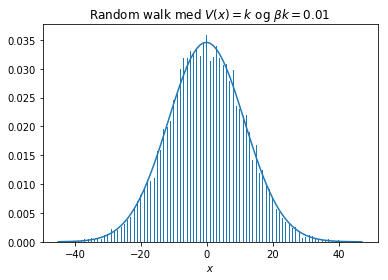

Fig 4.1.1 : partikkelfordeling for 10000 partikler etter 200 steg.
 Forventingsverdi: -0.144 . Standardavvik: 11.535


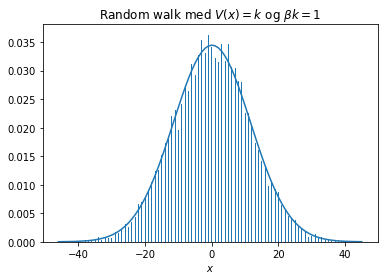

Fig 4.1.2 : partikkelfordeling for 10000 partikler etter 200 steg.
 Forventingsverdi: 0.064 . Standardavvik: 11.575


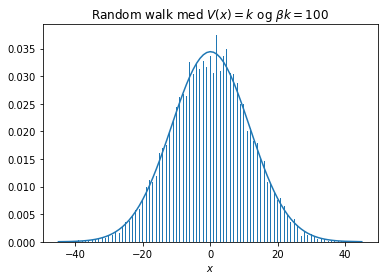

Fig 4.1.3 : partikkelfordeling for 10000 partikler etter 200 steg.
 Forventingsverdi: 0.105 . Standardavvik: 11.587


In [26]:
for b in Bk:
    posisjoner1 = randomWalk(V4_1,antall_partikler,antall_steg,startpos,b)
    x1,y1 = vekting(posisjoner1)


    #bruker scipy.norm til å tilpasse normalfordeling
    mu1, std1 = norm.fit(posisjoner1)
    p1 = norm.pdf(x1,mu1,std1)
    

    
    plt.bar(x1,y1,width=0.3)
    plt.xlabel("$x$")
    plt.title("Random walk med $V(x) = k$ og $\\beta k =$" + repr(b))
    plt.plot(x1,p1)

    plt.show()
    print("Fig 4.1."+str(Bk.index(b)+1), ": partikkelfordeling for", antall_partikler, "partikler etter",antall_steg, "steg."
          "\n Forventingsverdi:", round(mu1,3), ". Standardavvik:",round(std1,3))


Figur 4.1.1-3. viser at i et plant potensial vil styrken til potensialet ikke påvirke partikkelfordelingen. Ettersom potensialforskjellen mellom alle posisjonene er lik, vil sannsynligheten for å bevege seg til høyre eller venstre, eller bli stående være lik, og partiklene vil normalfordele seg.

## 4.2

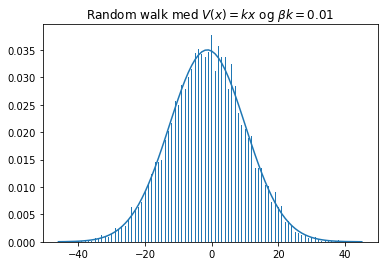

Fig 4.2.1 : partikkelfordeling for 10000 partikler etter 200 steg.
 Forventingsverdi: -1.33 . Standardavvik: 11.386


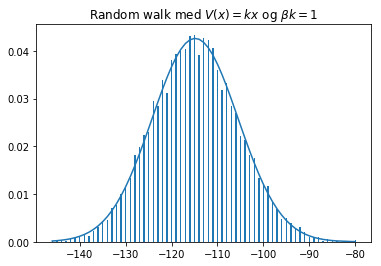

Fig 4.2.2 : partikkelfordeling for 10000 partikler etter 200 steg.
 Forventingsverdi: -114.877 . Standardavvik: 9.357


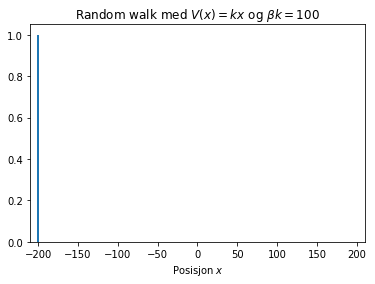

Fig 4.2.3: Partikkelfordeling for 10000 partikler etter 200 steg.


In [27]:
for i in range(0,2):
    posisjoner2 = randomWalk(V4_2,antall_partikler,antall_steg,startpos,Bk[i])
    x2,y2 = vekting(posisjoner2)


    #bruker scipy.norm til å tilpasse normalfordeling (bare etterspurt på oppg 4.1)
    mu2, std2 = norm.fit(posisjoner2)
    p2 = norm.pdf(x2,mu2,std2)

    plt.bar(x2,y2,width=0.3)
    plt.plot(x2,p2)
    
    plt.title("Random walk med $V(x) = kx$ og $\\beta k =$"+ repr(Bk[i]))
    
    plt.show()
    print("Fig 4.2."+str(i+1), ": partikkelfordeling for", antall_partikler, "partikler etter",antall_steg, "steg."
          "\n Forventingsverdi:", round(mu2,3), ". Standardavvik:",round(std2,3))
    
#Må plotte separat for Bk=100 fordi potensialet dominerer såpass mye at alle
#partikler samler seg på et punkt og det ikke kan tilpasses normalfordeling
posisjoner2 = randomWalk(V4_2,antall_partikler,antall_steg,startpos,100)
x2,y2 = vekting(posisjoner2)

plt.xlim(-(antall_steg+10),(antall_steg+10))
plt.bar(x2,y2,width=2.0)

plt.title("Random walk med $V(x) = kx$ og $\\beta k =100$")
plt.xlabel("Posisjon $x$")                                                                  
                                                                   
plt.show()
print("Fig 4.2.3: Partikkelfordeling for", antall_partikler, "partikler etter",antall_steg, "steg.")

For et lineært potensial vil partikkelfordelingen avhenge av $\beta k$. Dette er fordi $\beta k$ her kan tolkes som forholdet mellom energien i potensialet og den termiske energien som er tilgjengelig ettersom $\beta k = k \cdot \frac{1}{k_B T} $, der $k_B T$ er et mål på den termiske energien og styrken av potensialet er proporsjonal med k for en gitt posisjon.  
Dersom $\beta k << k_BT$ vil altså potensialet ha lav styrke og tilnærmet ikke virke på partiklene. I figur 4.2.1 ser man at forventningsverdien til posisjonen er noe forskyvet i forhold til tilfeldig sprang i plant potensialet som vist i figur 4.1.1, men partiklene vil fortsatt være normalfordelt.
På samme måte ser man i figur 4.2.2 at partikkelfordelingen har flyttet seg mot venstre for $\beta k = 1$, i retning minkende potensial, og at standardavviket er blitt mindre ettersom potensialet virker sterke på partiklene.

Når $\beta k = 100$ tilsvarer det $k >> k_BT$, altså at potensialet som virker på partiklene er sterkt i forhold til den tilgjengelige termiske energien. Dette kommer tydelig frem i figur 4.2.3. der man ser at alle partiklene er i posisjon $x = -200$ etter 200 steg, dvs. at alle partiklene har flyttet seg mot venstre for hvert steg. Som diskutert tidligere i oppg.3.3 er dette fordi sannsynligheten for å hoppe til venstre blir veldig stor, mens sannsynlighetene for å hoppe mot høyre eller bli stående blir tilnærmet lik null.

## 4.3

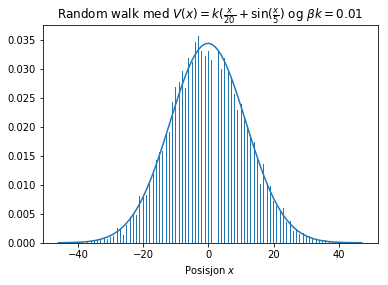

Fig 4.3.1 : partikkelfordeling for 10000 partikler etter 200 steg 
 med ßk = 0.01


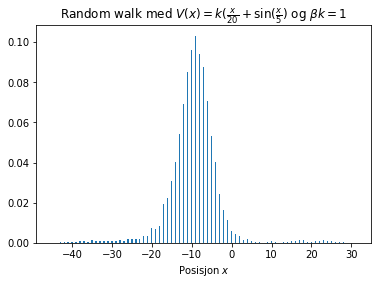

Fig 4.3.2 : partikkelfordeling for 10000 partikler etter 200 steg 
 med ßk = 1


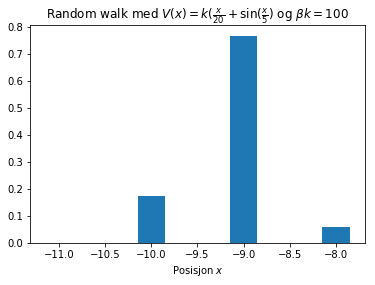

Fig 4.3.3 : partikkelfordeling for 10000 partikler etter 200 steg 
 med ßk = 100


In [28]:
for b in Bk:
    posisjoner3 = randomWalk(V4_3,antall_partikler,antall_steg,startpos,b)
    x3,y3 = vekting(posisjoner3)


    #bruker scipy.norm til å tilpasse normalfordeling (bare etterspurt på oppg 4.1)
    mu3, std3 = norm.fit(posisjoner3)
    p3 = norm.pdf(x3,mu3,std3)

    plt.bar(x3,y3,width=0.3)
    
    if (b == 0.01):
        plt.plot(x3,p3)
        
    plt.title("Random walk med $V(x) = k(\\frac{x}{20} + \\sin(\\frac{x}{5})$ og $\\beta k =$"+ repr(b))
    plt.xlabel("Posisjon $x$")


    plt.show()
    print("Fig 4.3."+str(Bk.index(b)+1), ": partikkelfordeling for", antall_partikler, "partikler etter",antall_steg, "steg", 
          "\n med ßk = " + repr(b))

For dette potensialet $V(x) = k(\frac{x}{20} + \sin(\frac{x}{5}))$ ser man at verdien av $\beta k$ påvirker partikkelfordelingen på en tilsvarende måte som i oppgave 4.2. Dette potensialet er en sinuskurve som stiger lineært med økende x-verdier, og man ser derfor en forskyvning mot venstre i figur 4.3.2 når $\beta k = 1$. 

For $\beta k = 100$ ser man derimot at alle partiklene har samlet deg på tre diskrete punkter som vist i figur 4.3.3. Disse punktene ligger rundt bunnpunktet til potensialfunksjonen som ligger i $x \approx -9.1$.

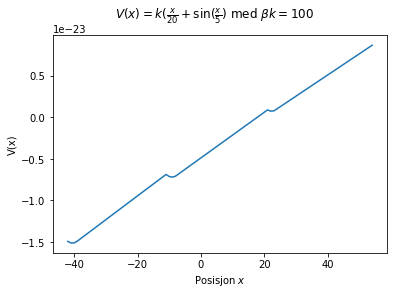

Fig 4.3.4: Potensialet når ßk=100, dvs. for de siste 200 stegene av simuleringen.


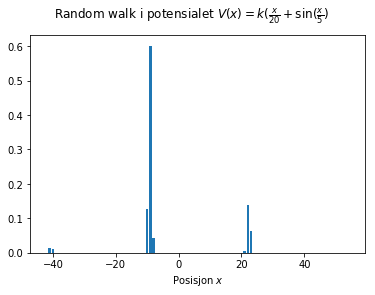

Fig.4.3.5: Partikkelfordeling etter 200 steg med ßk=0.01, påfulgt av 200 steg med ßk=100.


In [29]:
posisjoner_runde1= randomWalk(V4_3,antall_partikler,antall_steg,startpos,0.01)
                
posisjoner_runde2 = randomWalk2(V4_3,antall_partikler,antall_steg,posisjoner_runde1,100)
x_r,y_r = vekting(posisjoner_runde2)

#plotter potensialet
plt.plot(x_r,V4_3(x_r,100))
plt.suptitle("$V(x) = k(\\frac{x}{20} + \\sin(\\frac{x}{5})$ med $\\beta k = 100$")
plt.xlabel("Posisjon $x$")
plt.ylabel("V(x)") #burde kanskje inkludere enhet?
plt.show()
print("Fig 4.3.4: Potensialet når ßk=100, dvs. for de siste 200 stegene av simuleringen.")


#plotter fordelingen etter 400 steg
plt.bar(x_r,y_r)
plt.suptitle("Random walk i potensialet $V(x)=k(\\frac{x}{20} + \\sin(\\frac{x}{5})$")
plt.xlabel("Posisjon $x$")

plt.show()
print("Fig.4.3.5: Partikkelfordeling etter 200 steg med ßk=0.01, påfulgt av 200 steg med ßk=100.")

Partikkelfordelingen her viser hvordan startfordelingen til partiklene påvirker sluttfordelingen. Etter 200 steg i potensialet med $\beta k = 0.01$ vil vi ha en fordeling som i figur 4.3.1. Dermed vil partiklene ha en annen utgangsposisjon enn tidligere når de beveger seg i potensialet med $\beta k = 100$. 
Vi ser igjen at partiklene samler seg i et fåtall punkter, som tidligere vist i figur 4.3.3 etter 200 steg med $\beta k = 100$, men denne gangen er det tre områder der partiklene samler seg.

Vi kan se fra figur 4.3.4 at disse områdene tilsvarer de lokale bunnpunktene til potensialet. I startfordelingen vil noen av partiklene allerede befinne seg til venstre for bunnpunktet i $x \approx -9.1$, slik at disse vil ramle ned til bunnpunktet i  $x \approx -40.5 $, mens noen partikler vil ha bevegd seg såpass lang til høyre mens $\beta k = 0.01$ at de havner i bunnpunktet i $x \approx 22.3$.

## 4.4

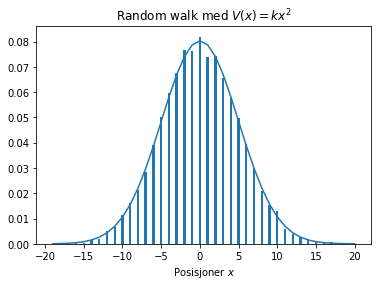

Fig.4.4.1 : partikkelfordeling for 10000 partikler etter 200 steg, med ßk=0.01


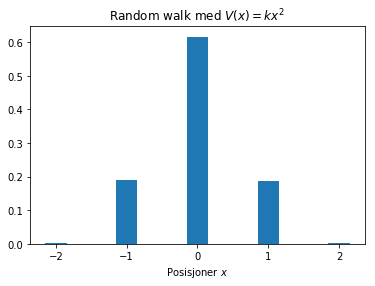

Fig.4.4.2 : partikkelfordeling for 10000 partikler etter 200 steg, med ßk=1


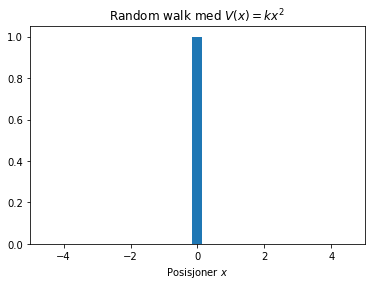

Fig.4.4.3 : partikkelfordeling for 10000 partikler etter 200 steg, med ßk=100


In [30]:
for b in Bk:
    posisjoner4 = randomWalk(V4_4,antall_partikler,antall_steg,startpos,b)
    x4,y4 = vekting(posisjoner4)
    
    
    if (b == 0.01):
        mu4, std4 = norm.fit(posisjoner4)
        p4 = norm.pdf(x4,mu4,std4)
        plt.plot(x4,p4)
    
    plt.title("Random walk med $V(x)=kx^2$")
    plt.xlabel("Posisjoner $x$")
    
    if np.amin(posisjoner4) == np.amax(posisjoner4):
        plt.xlim(-(abs(np.amin(posisjoner4))+5),(np.amax(posisjoner4)+5))
    
    plt.bar(x4,y4,width=0.3)

    plt.show()
    print("Fig.4.4."+str(Bk.index(b)+1),": partikkelfordeling for",antall_partikler,"partikler etter",antall_steg,
             "steg, med ßk="+repr(b))

Her ser man at potensialet påvirker partikkelfordelingen sterkere enn i de tidligere oppgavene. For $\beta k = 0.01$ er partiklene fortsatt normalfordelt som vist i figur i 4.4.1, enn om noe smalere enn tidligere, men allerede for $\beta k = 1$ i figur 4.4.2 er det kun et fåtall posisjoner partiklene kan ha, og i figur 4.4.3 er alle partiklene samlet i $x=0$.
Dette er fordi x inngår kvadratisk i uttrykket for potensialet, og etterhvert som x-verdiene øker vil potensialforskjellen mellom to posisjoner derfor bli veldig stor. Her vil det altså ikke være nok å kun se på $\beta k$ for å vurdere styrken av potensialet i forhold til den termiske energien.

## Oppgave 5

Definerer konstanter og parametre

In [31]:
alpha = 0.8
T_p = 500   #Antall steg per syklus
h = 1       #Steglengde
N_x = 90    #antall x-verdier i en periode
beta = 1/(1.3806*10**-(23)*298)     #Antar romtemperatur
k = 4.1142*10**-18       #Velger k slik at k*beta = 1000
N_p = 12*N_x    #Partikkeltall
antall_sykluser = 10

In [32]:
def V_2(x, alpha):
    return 2/N_x

def V_1(x, alpha):
    #Dersom alpha er tilstrekkelig lav, vil ikke potensialet vi får fra V_1 lenger
    #tolkes som et sagtann-potensiale, men som et lineært potensiale med negativt stigningstall.
    #Håndterer dette unntaket med en if-setning
    if(alpha*N_x == 0):
        if x < 0:
            return(-x/((1-alpha)*N_x))
        else:
            return 1
    #For "normale" verdier av alpha, dvs ikke 0 eller 1:
    if(x<0):
        return(-x/((1-alpha)*N_x))
    else:
        return(x/(alpha*N_x))

def koordinatoversetter(x, alpha):
    x_verdi_til_pot = x
    if x_verdi_til_pot >= N_x + alpha * N_x:
        x_verdi_til_pot -= 2 * N_x
    elif x_verdi_til_pot >= alpha * N_x:
        x_verdi_til_pot -= N_x
    return x_verdi_til_pot


#Finner sannsynlighetene for å bevege seg opp, ned eller bli værende
#Disse funksjonene likner svært på de som er definert over, men de tar også inn en del konstanter, slik at de blir
#lettere å bruke igjen for senere utregninger med andre parametre.
def p_pluss(x, potensial, beta, k, alpha):
    return(1/(1+np.exp(-beta*k*(potensial(x, alpha)-potensial(x+h, alpha)))+np.exp(-beta*k*(potensial(x-h, alpha)-potensial(x+h, alpha)))))

def p_null(x, potensial, beta, k, alpha):
    return (1/(1+np.exp(-beta*k*(potensial(x+h, alpha)-potensial(x, alpha)))+np.exp(-beta*k*(potensial(x-1, alpha)-potensial(x, alpha)))))

def p_minus(x, potensial, beta, k, alpha):
    return (1/(1+np.exp(-beta*k*(potensial(x, alpha)-potensial(x-h, alpha)))+np.exp(-beta*k*(potensial(x+1, alpha)-potensial(x-1, alpha)))))

#Lager startfordeling for main(startfordeling)
def startfordeling1(N_p=90*12,N_x=90):
    startfordeling1 = np.array([])
    for i in range(2*N_x):
        for e in range(int(N_p/(2*N_x))):
            startfordeling1 = np.append(startfordeling1, [i])
    #Startfordelingen er nå definert med seks partikler i hvert punkt.
    return startfordeling1

def startfordeling2(N_p=90*12,N_x=90):
    startfordeling2 = np.array([])
    for i in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, 0)
    for j in range(int(N_p/2)):
        startfordeling2 = np.append(startfordeling2, N_x)
    #Startfordeling to har halvparten av partiklene i x=0 og den andre halvparten i x=N_x
    return(startfordeling2)

def plotFordeling(array):
    verdi, antall = np.unique(array, return_counts=True)
    #Verdien vil har antallet på korresponderende plass i antall-lista
    plt.bar(verdi, antall)
#    print(verdi, antall)
    plt.ylim(0, max(antall))
    plt.xlim(-1, 180)
    plt.show()

In [33]:
#Lager startfordeling i main()
def motorProteins(startfordeling, T_p = 500, alpha = 0.8, beta = 1/(1.3806*10**-(23)*298), k = 4.1142*10**-18, antall_sykluser = 10, N_x=90):
    fordeling = startfordeling
    partikkelstrømliste = []   
    hoppsannsynlighetV_1 = {}
    hoppsannsynlighetV_2 = {}

    for i in range(2*N_x):
        hoppsannsynlighetV_1[i] = [p_minus(koordinatoversetter(i*h, alpha), V_1, beta, k, alpha), p_null(koordinatoversetter(i*h, alpha), V_1, beta, k, alpha),
                               p_pluss(koordinatoversetter(i*h, alpha), V_1, beta, k, alpha)]
    for i in range(2*N_x):
        hoppsannsynlighetV_2[i*h] = [p_minus(i*h, V_2, beta, k, alpha), p_null(i*h, V_2, beta, k, alpha), p_pluss(i*h, V_2, beta, k, alpha)]
   
    for e in range(0, 2*antall_sykluser):
        #Alternerer mellom potensial 2 og 1
        if e%2 == 0:
            sannsynligheter = hoppsannsynlighetV_2
        else:
            sannsynligheter = hoppsannsynlighetV_1        
        #Vi teller opp antall partikkelsteg etter hvert som tiden går, og lagrer dem i variabelen
        #partikkelstrøm
        partikkelstrøm = 0
        
        for i in range(0, T_p):
            for j in range(0, len(fordeling)):
                tall = random.uniform(0, 1)
                x_verdi = fordeling[j]
                if tall <= sannsynligheter[x_verdi][0]:
                    fordeling[j] -= h
                    partikkelstrøm -= 1
                    #Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == -1:
                        fordeling[j] = 2 * N_x - 1
                elif tall >= 1-sannsynligheter[x_verdi][2]:
                    fordeling[j] += h
                    partikkelstrøm += 1
                    #Igjen: Vi må passe på at ingen partikler faller utenfor det gyldige området
                    if fordeling[j] == 2*N_x:
                        fordeling[j] = 0
        
        #plotFordeling(fordeling)
        
        partikkelstrømliste.append(partikkelstrøm/(len(startfordeling)))
    #Har nå lagret partikkelstrømmen per syklushalvdel. Må behandle den litt slik at den ønskede formen oppstår.
    gjennomsnittsstrøm = []
    for i in range(int(len(partikkelstrømliste)/2)):
        gjennomsnittsstrøm.append((partikkelstrømliste[2*i] + partikkelstrømliste[2*i+1])/(2*T_p))
    return(gjennomsnittsstrøm)


## Oppg. 5.1

Netto strømning per syklus med alpha = 0.8:
 [-0.026083333333333333, -0.015333333333333334, -0.013083333333333332, -0.013583333333333333, -0.015583333333333334, -0.014583333333333334, -0.013916666666666666, -0.013166666666666669, -0.013416666666666665, -0.0145]
Netto strømning per syklus med alpha = 0.2:
 [0.0285, 0.014166666666666666, 0.016583333333333332, 0.014333333333333333, 0.0155, 0.014416666666666666, 0.01475, 0.015416666666666667, 0.015333333333333332, 0.01475]


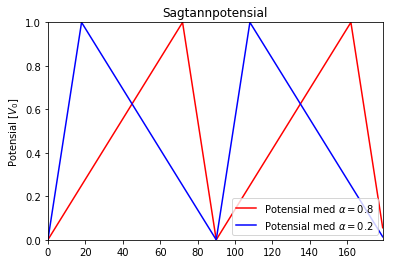

Figur 5.1


In [34]:
print("Netto strømning per syklus med alpha = 0.8:\n", motorProteins(startfordeling1(),antall_sykluser=10))
print("Netto strømning per syklus med alpha = 0.2:\n", motorProteins(startfordeling1(),antall_sykluser=10, alpha = 0.2))

#Potensialplot:
x_liste = []
y_liste = []
z_liste = []
for i in range(2*N_x):
    x_liste.append(i)
    y_liste.append(V_1(koordinatoversetter(i, alpha = 0.8), alpha = 0.8))
    z_liste.append(V_1(koordinatoversetter(i, alpha = 0.2), alpha = 0.2))
plt.plot(x_liste, y_liste, color = "red", label = r"Potensial med $\alpha = 0.8$")
plt.plot(x_liste, z_liste, color = "blue", label = r"Potensial med $\alpha = 0.2$")
plt.ylim(0, max(y_liste))
plt.ylabel(r"Potensial [$V_0$]")
plt.xlim(0, 179)
plt.title("Sagtannpotensial")
plt.legend()
plt.show()

print("Figur 5.1")

I hver av listene over er det ti verdier for $J_{avg}$. Den første listen viser verdiene med $\alpha = 0.8$ og den andre er for $\alpha = 0.2$. Figur 5.1 viser sagtannformen til potensialene. Det fremgår at de er speilvendte av hverandre. 

Simuleringen gir at $J_{avg}$ ikke er null. Det betyr at vi har en netto-strøm i en av retningene, ettersom $J_{avg}$ er definert som summen av alle hopp i positiv x-retning minus summen av hopp i negativ x-retning, delt på antall partikler, delt på antall tidssteg. $J_{avg}$ er altså et mål på hvor mange hopp det skjer per partikkel per tidsenhet i en bestemt retning. I et konstant potensial, vil netto strøm være svært nær null, ettersom netto partikkelstrøm kun vil være bestemt av hopp med like stor sannsynlighet for å gå i positiv som i negativ retning. Når partiklene skifter potensialfunksjon, vil partiklene falle ned mot lavest potensial. Den lengste ryggen av sagtannen vil fange opp flest partikler, og vil bestemme i hvilken retning det blir netto drift. Ettersom $\alpha = 0,8$ og $\alpha = 0,2$ gir opphav til to speilvendte potensialfunskjoner, er det rimelig å anta at resultatene blir omtrent like, bare med omvendt fortegn.

$J_{avg}(0)$ er omtrent dobbelt så stor som $J_{avg}(n)$. Dette skyldes at partiklene starter helt uniformt spredt utover. Da vil sagtennene fange mange partikler, og forårsake stor netto drift. Hver gang potensialene skifter, ligger alle partiklene (med det sterke potensialet $\beta k = 1000$) samlet i bunnpunktene. Partiklene vil spre seg tilfeldig utover, som skaper en gaussdistribusjon om bunnpunktene. En andel av gaussdistribusjonen vil ha driftet langt nok til å bli fanget opp av den neste sagtannen, men denne andelen vil være mindre enn andelen som blir fanget opp når spredningen av partiklene er uniform. Derfor er driften i den første syklusen større enn i de senere syklusene.

## Oppg. 5.2

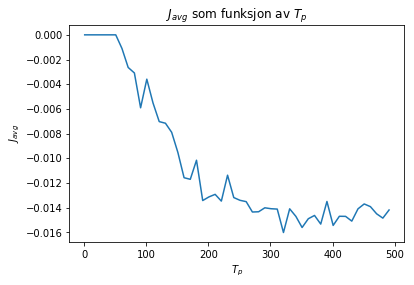

Figur 5.2.1


In [35]:
x_verdier =[]
y_verdier=[]
for t_p in range(1,500,10):
    x_verdier.append(t_p)
    y_verdier.append(motorProteins(startfordeling2(N_p = 3600, N_x = 90),T_p = t_p, alpha = 0.8, beta = 1, k = 1000, antall_sykluser = 1, N_x = 90) [0])

plt.plot(x_verdier, y_verdier)    

plt.xlabel(r'$T_{p}$')
plt.ylabel(r'$J_{avg}$')
plt.title(r"$J_{avg}$ som funksjon av $T_{p}$")
plt.show()
print("Figur 5.2.1")

Figur 5.2.1 viser at for lave verdier av $T_p$, blir strømningen tilnærmet lik null. Det skjer fordi partiklene ikke rekker å spre seg nok utover i det konstante potensialet til å bli fanget opp av en ny sagtann i sagtannpotensialet. Etter hvert som tiden går vil flere og flere partikler ha driftet langt nok, og $J_{avg}$ øker. Ettersom $J_{avg}$ er partikkelstrøm per partikkel per tid, synes det fra grafen at etter hvert som man skrur tiden opp, vil ikke økningen av antall partikler gjøre opp for at tiden øker, og $J_{avg}$ flater ut. Dersom vi hadde latt $T_p$ bli enda større, er det å forvente at $J_{avg}$ går mot null, fordi det per syklus kun finnes et endelig antall partikler som kan skape $J_{avg}$. 

## Oppgave 6

Definerer den analytiske strømningsfunksjonen $J_{avg}$.

In [36]:
def J_avg(alfa, N_x, T_p):
    return (N_x/(4*T_p))*(special.erfc((alfa*N_x/2)*np.sqrt(3/T_p)) - special.erfc((((1-alfa)*N_x)/2)*np.sqrt(3/T_p)))

## 5.3 & 6.1

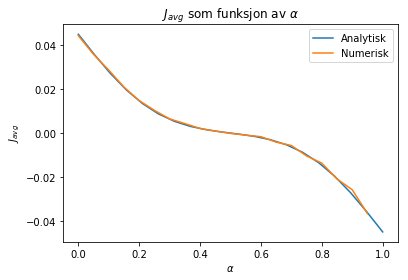

Figur 6.1.1


In [37]:
x_verdier = []
y_verdier = []

alpha=np.linspace(0,1,20)

for i in range(0,20):
    x_verdier.append(i/20)
    y_verdier.append(motorProteins(startfordeling2(3600,N_x = 90), T_p=500, alpha=i/20, beta=1, k=1000, antall_sykluser= 1 ,N_x=90) [0])

plt.figure()
plt.plot(alpha, J_avg(alpha, 90,500), label='Analytisk')
plt.plot(x_verdier, y_verdier, label='Numerisk')    
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$J_{avg}$')
plt.title(r"$J_{avg}$ som funksjon av $\alpha$")
plt.legend()
plt.show()

print("Figur 6.1.1")

Det numeriske plottet av $J_{avg}$ i figur 6.1.1 viser at netto strømning per partikkel per syklus er antisymmetrisk om $\alpha = 0.5$. Det er å forvente ettersom to verdier av $\alpha$ med like stor absoluttdifferanse til $0.5$ generer like potensialfunksjoner, bare speilvendte av hverandre, som vist i figur 5.1. Med $\alpha = 0.5$, vil sagtennene ha like lange sider, og det vil i snitt bli $0$ netto drift. I grensen $\alpha = 0$ vil sagtannen bare ha en lang side, som fanger opp halvparten av normalfordelingen som oppstår om bunnpunktet når partiklene befinner seg i det konstante potensialet. Det gir derfor den største driften.

Den blå grafen i figur 6.1.1 viser den analytiske strømningsfunksjonen $J_{avg}$ som funksjon av $\alpha$, mens den gule viser den numeriske. Vi kan se at grafene er tilnærmet like, men at den numeriske er mindre jevn ettersom den faktisk er basert på tilfeldig genererte tall.
Vi ser igjen at det blir en netto positiv strøm for $\alpha < 0.5$ fordi disse verdiene generer et sagtannpotensial der tennene er brattest på venstre side. De fleste partiklene vil derfor flytte seg til høyre langs det slakere potensialet. Denne strømmen vil være sterkest jo lavere verdien for$\alpha$ fordi stigningen da vil være slakest og følgelig kunne fange opp flere partikler. 

For $\alpha > 0.5$, vil sagtannpotensialet bli speilvendt, som gir en netto negativ strøm på tilsvarende måte som forklart ovenfor. I tilfelle $\alpha$ lik 0,5 blir det en netto strømning lik 0. Dette kommer av at like mange av partiklene vil bevege seg mot høyre og venstre grunnet sagtenner som er like bratte på begge sider.

## 6.2

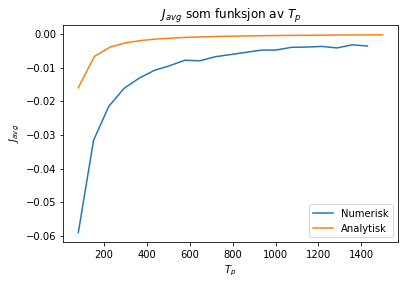

Figur 6.2.1


In [38]:
x_verdier =[]
y_verdier=[]
T_p2 = np.linspace(80,1500,20)

for t_p in range(80,1500,71):
    x_verdier.append(t_p)
    y_verdier.append(motorProteins(startfordeling2(N_p = 40*90,N_x = 10),T_p = t_p, alpha = 0.8, beta= 1, k=1000, antall_sykluser = 1,N_x = 10) [0])

plt.figure()
plt.plot(x_verdier, y_verdier, label='Numerisk')
plt.plot(T_p2, J_avg(0.8,10,T_p2), label='Analytisk')
plt.xlabel(r'$T_{p}$')
plt.ylabel(r'$J_{avg}$')
plt.title(r"$J_{avg}$ som funksjon av $T_{p}$")
plt.legend()
plt.show()

print("Figur 6.2.1")

Den blå grafen i figur 6.2.1 viser den numeriske strømningsfunksjonen, $J_{avg}$, som funksjon av $T_{p}$, mens den oransje viser den analytiske. I følge begge grafene vil strømningen gå mot 0 når tiden øker. Dette kan forstås både matematisk og fysisk. I den analytiske strømningsfunksjonen deles antall diskrete punkter, $N_{x}$, på antall tidssteg, $T_{p}$. Dermed vil $J_{avg}$ bli strømningen per tidsenheten, som fører til at når antall tidssteg blir veldig stort vil strømningsfunksjonen gå mot 0. 
En fysisk tolkning av grafen for den numeriske løsningen er at i starten av simuleringen er det et maks antall partikler som kan bevege seg. Etter en viss tid vil partikkelbevegelsen bli mindre siden partiklene har falt til ro i sitt potensial, og dermed vil $J_{avg}$ gå mot 0.
Figur 6.2.1 viser også at den analytiske grafen går fortere mot 0 enn den numeriske. Dette kommer av at den numeriske er mer preget av tilfeldigheter og det er dermed mulig at det fortsatt er en netto drift av partikler etter lang tid. 

## 6.3

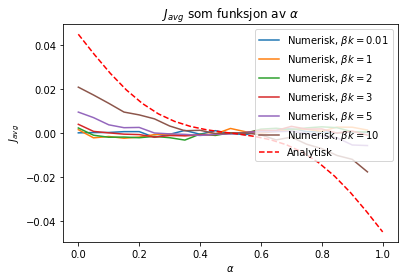

Figur 6.3.1


In [39]:
x_verdier = []
y1_verdier = []
y2_verdier = []
y3_verdier = []
y4_verdier = []
y5_verdier = []
y6_verdier = []

alpha=np.linspace(0,1,20)

for i in range(0,20):
    x_verdier.append(i/20)
    y1_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=0.01, antall_sykluser= 1 ,N_x=90) [0])
    y2_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=1, antall_sykluser= 1 ,N_x=90) [0])
    y3_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=2, antall_sykluser= 1 ,N_x=90) [0])    
    y4_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=3, antall_sykluser= 1 ,N_x=90) [0])
    y5_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=5, antall_sykluser= 1 ,N_x=90) [0])
    y6_verdier.append(motorProteins(startfordeling2(1080,N_x = 90), T_p=500, alpha=i/20, beta=1, k=10, antall_sykluser= 1 ,N_x=90) [0])    
    
plt.figure()
plt.plot(x_verdier, y1_verdier, label=r'Numerisk, $\beta k=0.01$') #bk=0.01
plt.plot(x_verdier, y2_verdier, label=r'Numerisk, $\beta k=1$') #bk=1
plt.plot(x_verdier, y3_verdier, label=r'Numerisk, $\beta k=2$') #bk=2
plt.plot(x_verdier, y4_verdier, label=r'Numerisk, $\beta k=3$') #bk=3
plt.plot(x_verdier, y5_verdier, label=r'Numerisk, $\beta k=5$') #bk=5
plt.plot(x_verdier, y6_verdier, label=r'Numerisk, $\beta k=10$') #bk=10
plt.plot(alpha, J_avg(alpha, 90,500), 'r--' ,label='Analytisk')  
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$J_{avg}$')
plt.title(r"$J_{avg}$ som funksjon av $\alpha$")
plt.legend()
plt.show()

print("Figur 6.3.1")


Figur 6.3.1 viser $J_{avg}$ som funksjon av $\alpha$ der den numeriske grafen er plottet for ulike verdier av $\beta k$. I figuren er det tydelig at jo høyere $\beta k$ blir, jo mer samsvarer det numeriske plottet med det analytiske. Dette stemmer med antakelsen om at for store verdier for $\beta k$, som er forholdet mellom den potensielle og termiske energien, vil potensialet dominere. Den analytiske løsningen ser kun på hvordan potensialet påvirker partikkelbevegelsen, og derfor vil det numeriske plottet med $\beta k =10$ ligge nærmere den analytiske enn for lavere verdier. Jo mindre $\beta k$ blir, jo mer vil den termiske energien påvirke simuleringen og forskjellen mellom analytisk og numerisk løsning øker. 

## 6.4

Den analytiske løsningen for strømningsfunksjonen er ikke komplett. Dette kommer av at den kun ser på hvordan partiklene vil bevege seg i forhold til potensialet de befinner seg i. I et flatt potensial vil de normalfordeles, mens i sagtannpotensialet vil de søke et potensialminima. I utledningen av den analytiske løsningen antas det at alle partiklene vil havne i en av potensialets bunnpunkter i løpet en syklus $2T_p$. Den numeriske løsningen tar derimot høyde for at partiklene også har en viss termisk energi som påvirker partikkelbevegelsen slik at de kan bevege seg mer fritt i potensialet. Når $\beta k$ blir lav vil den termiske energien gi en mer tilfeldig strømning i systemet, mens den potensielle energien vil bli mindre avgjørende. Den analytiske løsningen holder derfor ikke når forholdet mellom den potensielle og den termiske energien blir lite. 